In [147]:
import pandas as pd

df = pd.read_csv("data/randomized_search_5000_iter.csv")

In [161]:
df.describe()

,no_topics,min_df,max_df,alpha,eta,c_v
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8.502000,0.055134,0.303250,0.252478,0.153810,0.313491
std,4.037828,0.028701,0.114651,0.145345,0.086377,0.026457
min,2.000000,0.010000,0.110000,0.010000,0.010000,0.197514
25%,5.000000,0.030000,0.210000,0.130000,0.080000,0.297914
50%,9.000000,0.060000,0.300000,0.250000,0.150000,0.317137
75%,12.000000,0.080000,0.400000,0.380000,0.230000,0.331982
max,15.000000,0.100000,0.500000,0.500000,0.300000,0.386777


In [86]:
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

data = pd.read_csv("data/preprocessed_stories.csv", header=None, names=["story"])

# tokenize the data for corpus and dictionary
tokens_list = [story.split() for story in data["story"]]

# create a dictionary of the data and filter out the extremes
dictionary = Dictionary(tokens_list)
dictionary.filter_extremes(no_below=0.07*data.size, no_above=0.30)

# create a corpus of the data
corpus = [dictionary.doc2bow(text) for text in tokens_list]

# get the coherence score of the topic model
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, random_state=0, alpha=0.05, eta=0.02)

In [52]:
# tokenize the data for corpus and dictionary
tokens_list2 = [story.split() for story in data["story"]]

# create a dictionary of the data and filter out the extremes
dictionary2 = Dictionary(tokens_list)
dictionary2.filter_extremes(no_below=0.02*data.size, no_above=0.20)

# create a corpus of the data
corpus2 = [dictionary.doc2bow(text) for text in tokens_list]

# get the coherence score of the topic model
lda2 = LdaModel(corpus=corpus2, id2word=dictionary2, num_topics=6, random_state=0, alpha=0.07, eta=0.05)

In [87]:
dic = dict()

for bag in corpus:
    for word in bag:
        if dictionary.get(word[0]) in dic:
            dic[dictionary.get(word[0])][0] += word[1]
            dic[dictionary.get(word[0])][1] += 1

        else:
            dic[dictionary.get(word[0])] = [word[1], 1]

dic

{'amount': [539, 361],
 'asking': [578, 508],
 'claimed': [960, 733],
 'company': [721, 458],
 'contact': [762, 590],
 'details': [962, 683],
 'even': [536, 429],
 'friend': [422, 281],
 'help': [793, 568],
 'immediately': [574, 518],
 'information': [535, 419],
 'internet': [711, 442],
 'job': [1079, 502],
 'know': [648, 507],
 'made': [515, 418],
 'money': [2137, 1013],
 'needed': [378, 317],
 'personal': [435, 369],
 'police': [855, 555],
 'scammer': [799, 508],
 'scammers': [308, 257],
 'sent': [593, 436],
 'time': [1065, 732],
 'use': [403, 347],
 'using': [574, 480],
 'verify': [341, 291],
 'whatsapp': [1191, 841],
 'would': [1044, 658],
 'app': [516, 308],
 'days': [441, 351],
 'give': [449, 368],
 'link': [393, 290],
 'message': [762, 599],
 'note': [420, 339],
 'send': [660, 477],
 'us': [463, 285],
 'work': [443, 332],
 'working': [306, 257],
 'day': [776, 525],
 'found': [471, 415],
 'however': [363, 322],
 'lost': [510, 459],
 'mentioned': [389, 295],
 'met': [294, 261],
 '

In [88]:
# turn the dictionary into a dataframe,
# df = pd.DataFrame.from_dict(dic, orient="index", columns=["count", "num_docs"])

# turn the dictionary into a dataframe, and give every word an index
df = pd.DataFrame.from_dict(dic, orient="index", columns=["count", "num_docs"])

In [89]:
df["num_docs_percent"] = df["num_docs"] / 3495

# sort by num_docs
df = df.sort_values(by="num_docs", ascending=False)
df.head(30)

,count,num_docs,num_docs_percent
called,1385,1027,0.293848
money,2137,1013,0.289843
phone,1405,992,0.283834
account,2014,964,0.275823
name,1456,961,0.274964
whatsapp,1191,841,0.240629
bank,1331,750,0.214592
claimed,960,733,0.209728
time,1065,732,0.209442
got,942,725,0.207439


/tmp/ipykernel_3524/2215338319.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


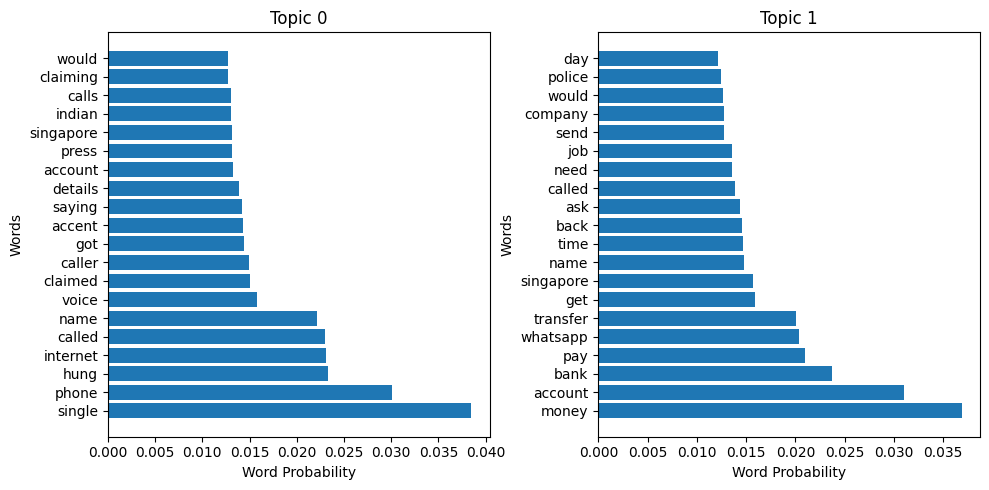

In [82]:
# visualize the topics and the words distribution in each topic

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,2, figsize=(10,5))

for ax, i in zip(axes.flatten(), [0,1]):
    fig.add_subplot(ax)
    topic = lda.show_topic(i, topn=20)
    x,y = zip(*topic)
    plt.barh(x,y)
    plt.title('Topic ' + str(i))
    plt.tight_layout()
    plt.xlabel('Word Probability')
    plt.ylabel('Words')

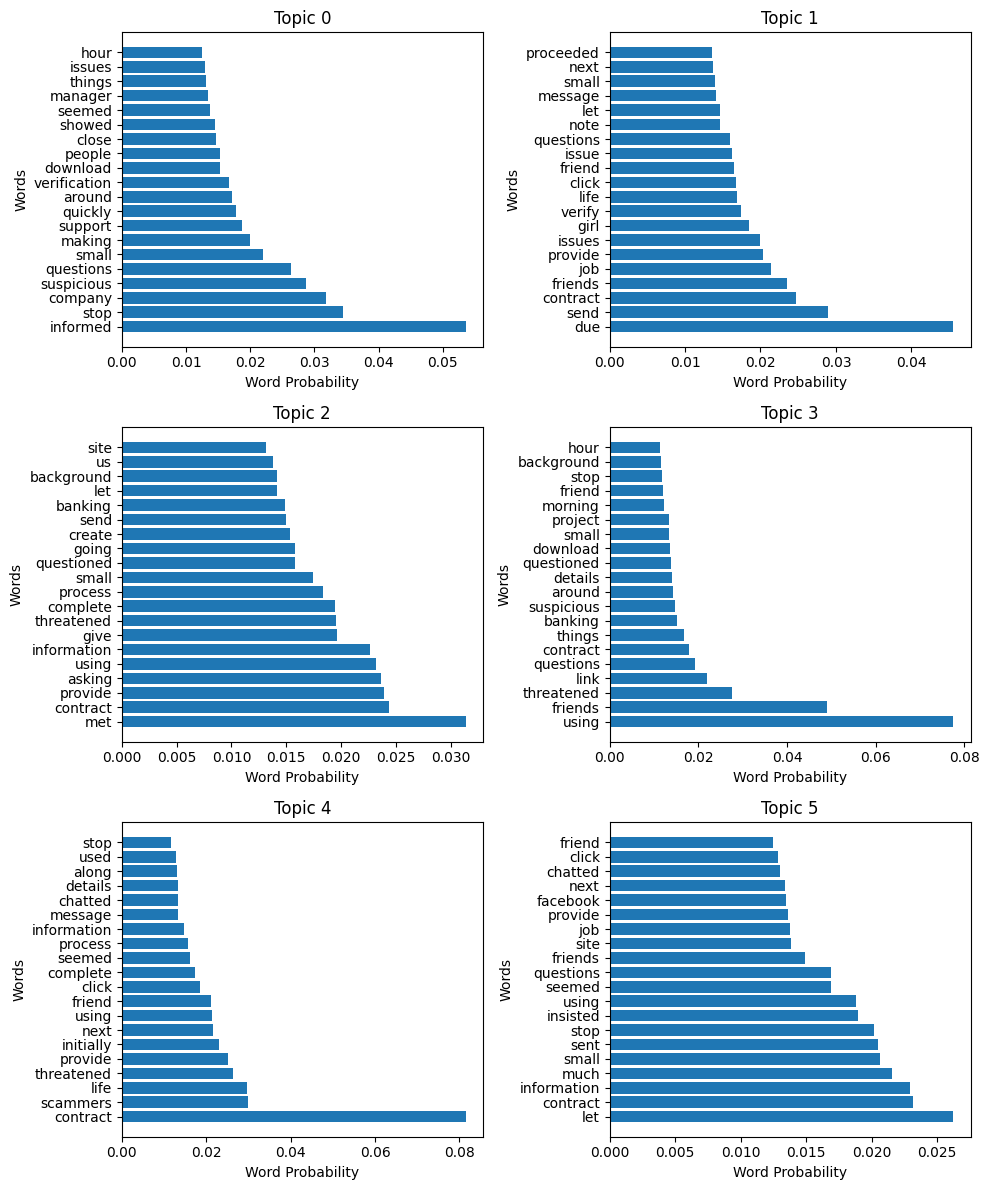

In [85]:
# visualize the topics and the words distribution in each of 6 topics

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic = lda2.show_topic(i, topn=20)
    x, y = zip(*topic)
    plt.barh(x, y)
    plt.title('Topic ' + str(i))
    plt.xlabel('Word Probability')
    plt.ylabel('Words')


plt.tight_layout()
plt.show()


In [34]:
from gensim.matutils import hellinger

t_1, t_2 = lda.show_topics()

# https://radimrehurek.com/gensim_3.8.3/auto_examples/tutorials/run_distance_metrics.html

def parse_topic_string(topic, lda):
    topic = topic.split('+')
    topic_bow = []
    for word in topic:
        prob, word = word.split('*')
        word = word.replace(" ","").replace('"', '')
        word = lda.id2word.doc2bow([word])[0][0]
        topic_bow.append((word, float(prob)))
    return topic_bow

t_1_distribution = parse_topic_string(t_2[1], lda)
t_2_distribution = parse_topic_string(t_1[1], lda)

print(hellinger(t_1_distribution, t_2_distribution))

0.44590817202134236


In [177]:
import numpy as np

list = lda2.show_topics()

distributions = []
for topic in list:
    distributions.append(parse_topic_string(topic[1], lda2))

# Calculate hellinger distance between each pair of distributions as a matrix
hellinger_matrix = np.zeros((len(distributions), len(distributions)))
for i in range(len(distributions)):
    for j in range(len(distributions)):
        hellinger_matrix[i][j] = hellinger(distributions[i], distributions[j])

print(hellinger_matrix)

[[0.         0.50348784 0.49849774 0.46313064 0.53338541 0.43923684]
 [0.50348784 0.         0.4296466  0.44801337 0.42078039 0.44611752]
 [0.49849774 0.4296466  0.         0.40459292 0.38553018 0.38807316]
 [0.46313064 0.44801337 0.40459292 0.         0.42527937 0.42855135]
 [0.53338541 0.42078039 0.38553018 0.42527937 0.         0.43687817]
 [0.43923684 0.44611752 0.38807316 0.42855135 0.43687817 0.        ]]


<Axes: title={'center': 'Proportion of Documents for Each Topic'}, xlabel='Topic', ylabel='Proportion'>

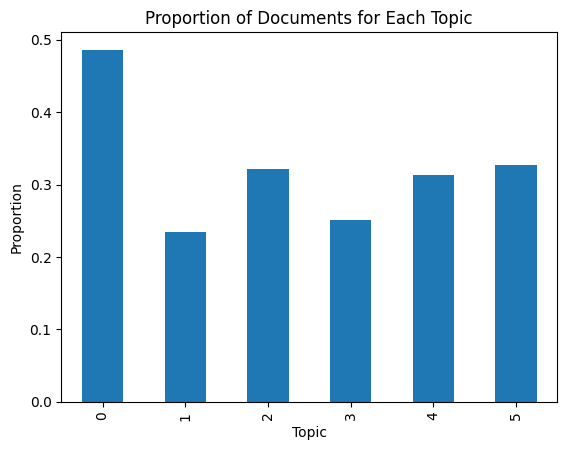

In [143]:
from collections import defaultdict

topic_distributions2 = [lda2.get_document_topics(doc) for doc in corpus2]
topic_distributions2


# Initialize a dictionary to store the topic counts
topic_counts = defaultdict(int)

# Iterate through all the topic distributions and count the occurrences of each topic
for list in topic_distributions2:
    for tuple in list:
        topic_counts[tuple[0]] += 1

topic_counts2 = pd.DataFrame.from_dict(topic_counts, orient='index', columns=['count']).sort_index()

topic_counts2['percentage'] = topic_counts2['count'] / 3495

# plot percentage of documents for each topic
topic_counts2['percentage'].plot.bar(title='Proportion of Documents for Each Topic', xlabel='Topic', ylabel='Proportion')

<Axes: title={'center': 'Proportion of Documents for Each Topic'}, xlabel='Topic', ylabel='Proportion'>

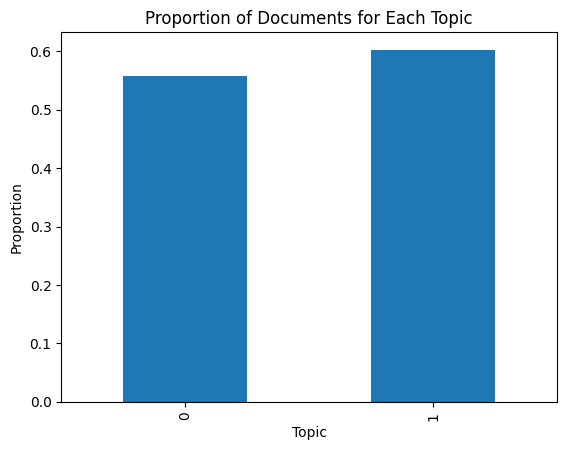

In [144]:
from collections import defaultdict

topic_distributions = [lda.get_document_topics(doc) for doc in corpus]
topic_distributions


topic_counts = defaultdict(int)

for doc_topics in topic_distributions:
    for topic, prob in doc_topics:
        topic_counts[topic] += 1

topic_counts = pd.DataFrame.from_dict(topic_counts, orient='index', columns=['count']).sort_index()

topic_counts['percentage'] = topic_counts['count'] / 3495

topic_counts['percentage'].plot.bar(title='Proportion of Documents for Each Topic', xlabel='Topic', ylabel='Proportion')

In [162]:
topic_counts2

,count,percentage
0,1699,0.486123
1,818,0.234049
2,1122,0.321030
3,880,0.251788
4,1094,0.313019
5,1145,0.327611


In [145]:
topic_counts

,count,percentage
0,1946,0.556795
1,2105,0.602289


In [141]:
topic_distributions

x = defaultdict(int)


for list in topic_distributions[:10]:
    for tuple in list:
        x[tuple[0]] += 1

x

defaultdict(int, {1: 9, 0: 2})